Create the graphics needed for the January 2023 discussion with Chief Avierett.
Goals:
1. Show stops by month over time, by type
2. Show stops per capita by race

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotting.lare_matplot as lmp

In [5]:
df = pd.read_csv("../data/clean_data/LAPD_RIPA_DATA_202101_202206.csv", 
                 encoding = 'utf-8-sig', 
                 engine ='python',
                 skipinitialspace=True)
df["stopTime"] = pd.to_datetime(df["stopTime"], format="%m/%d/%Y %H:%M")
std_cols = {"stopID": "stop_id",
            "stopTime": "date_time",
            "stopDuration": "duration",
            "stopInResponseToCFS": "call_for_service",
           "street": "location",
           "actionTakens": "actions_taken",
           "personSearchConsentGiven": "person_search_consent",
           "propertySearchConsentGiven": "property_search_consent",
           "perceivedRace": "race",
           "reasonForStop": "reason_for_stop",
           "perceivedOrKnownDisability": "disabilities",
            "perceivedLimitedEnglish": "limited_english",
            "perceivedAge": "age",
            "perceivedGender": "gender",
            "perceivedLgbt": "lgbt",
            "genderNonConforming": "gender_nonconforming",
            "resultOfStop": "result",
            "basisForSearch": "basis_for_search",
            "contrabandOrEvidenceDiscovered": "evidence_found"
           }
df.rename(columns=std_cols, inplace="True")

In [6]:
reasons = set([a.strip() for b in df['reason_for_stop'].str.split(';').values for a in b])

In [7]:
reasons

{'Consensual Encounter resulting in a search',
 'Investigation to determine whether the person was truant',
 'Knowledge of outstanding arrest warrant/wanted person',
 'Known to be on Parole / Probation / PRCS / Mandatory Supervision',
 'Reasonable Suspicion',
 'Traffic Violation'}

In [8]:
monthly = {k: df[df["reason_for_stop"] == k].groupby(pd.Grouper(key="date_time", freq="M")) for k in reasons}

In [9]:
monthly_df = pd.DataFrame({k: monthly[k].count()["stop_id"] for k in reasons}).fillna(0)

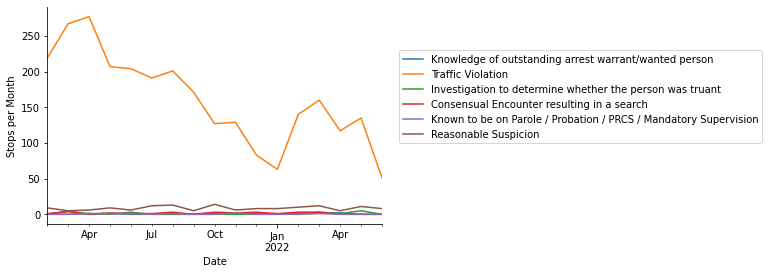

In [42]:
ax = monthly_df.plot()
ax.set(xlabel="Date", ylabel="Stops per Month")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()
plt.savefig("Stops_over_time.png", bbox_inches="tight")

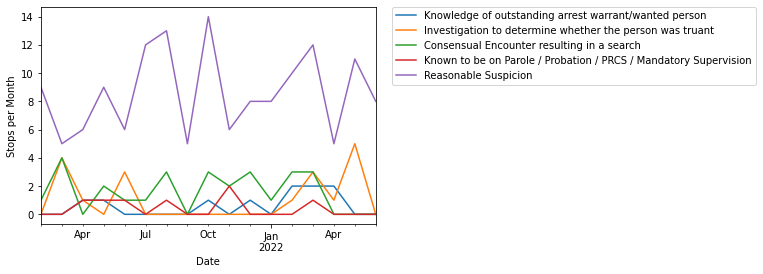

In [135]:
ax2= monthly_df.drop("Traffic Violation", axis=1).plot()
ax2.set(xlabel="Date", ylabel="Stops per Month")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig("Non_traffic_stops_over_time.png", bbox_inches="tight")

In [76]:
races = set([a.strip() for b in df['race'].str.split(';').values for a in b])

In [80]:
monthly_races = monthly = {k: df[df["race"] == k].groupby(pd.Grouper(key="date_time", freq="M")) for k in races}

In [126]:
monthly_races_df = pd.DataFrame({k: monthly_races[k].count()["stop_id"] for k in races}).fillna(0).sort_values(by="2021-02-28", axis=1, ascending=False)

In [127]:
monthly_races_df

,White,Hispanic/Latino/a,Asian,Middle Eastern or South Asian,Black/African American,Pacific Islander,Native American
date_time,,,,,,,
2021-02-28,113,51,35,19,9,2.0,0.0
2021-03-31,97,66,55,36,15,6.0,0.0
2021-04-30,120,79,41,27,9,4.0,1.0
2021-05-31,82,64,25,31,10,5.0,1.0
2021-06-30,82,38,50,31,7,4.0,2.0
2021-07-31,92,32,34,35,7,3.0,1.0
2021-08-31,87,36,39,35,10,6.0,0.0
2021-09-30,72,30,32,30,6,3.0,1.0
2021-10-31,62,30,21,13,7,7.0,3.0


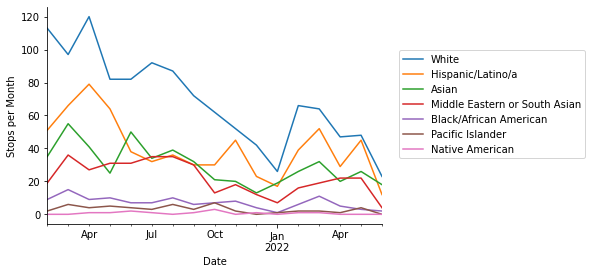

In [132]:
ax = monthly_races_df.plot()
ax.set(xlabel="Date", ylabel="Stops per Month")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()
plt.savefig("stops over time by race.png", bbox_inches="tight")

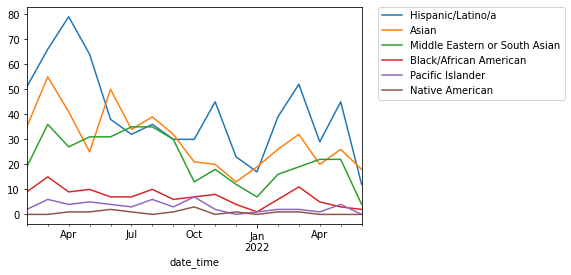

In [133]:
ax2= monthly_races_df.drop("White", axis=1).plot()
ax.set(xlabel="Date", ylabel="Stops per Month")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig("stops over time by race, exWhite.png", bbox_inches="tight")

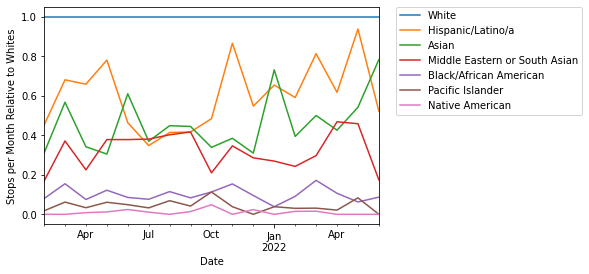

In [134]:
ax = monthly_races_df.div(monthly_races_df.White, axis=0).plot()
ax.set(xlabel="Date", ylabel="Stops per Month Relative to Whites")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
sns.despine
plt.savefig("stops over time by race relWhite.png", bbox_inches="tight")

In [44]:
import analysis.populations as pop

In [45]:
la_pop = pop.get_population("Los Altos")

In [49]:
df["race"].value_counts()

White                                                      1175
Hispanic/Latino/a                                           688
Asian                                                       506
Middle Eastern or South Asian                               377
Black/African American                                      120
Pacific Islander                                             52
Native American                                              12
Hispanic/Latino/a; White                                     10
Middle Eastern or South Asian; White                          5
Asian; White                                                  4
Hispanic/Latino/a; Pacific Islander                           3
Black/African American; White                                 3
Hispanic/Latino/a; Native American; White                     2
Asian; Pacific Islander                                       2
Hispanic/Latino/a; Native American                            2
Asian; Hispanic/Latino/a                

In [52]:
statsig_races = {"White", "Hispanic/Latino/a", "Asian", "Middle Eastern or South Asian", "Black/African American"}

In [109]:
ss_df = df[df["race"].isin(statsig_races)]

In [110]:
raw_stops = ss_df["race"].value_counts()

In [111]:
stops_per_hundred_per_year = 100*ss_df["race"].value_counts()/la_pop[la_pop.index.isin(statsig_races)]/1.5

In [112]:
stops_per_capita_relative_to_white= ss_df["race"].value_counts()/la_pop[la_pop.index.isin(statsig_races)]/(ss_df["race"].value_counts()["White"]/la_pop["White"])

In [113]:
stops_df = pd.DataFrame({"raw_stops": raw_stops, 
                         "stops_per_hundred_per_year": stops_per_hundred_per_year,
                         "stops_per_capita_relative_to_white": stops_per_capita_relative_to_white})

In [114]:
stops_df

,raw_stops,stops_per_hundred_per_year,stops_per_capita_relative_to_white
White,1175,4.416878,1.000000
Hispanic/Latino/a,688,33.800049,7.652475
Asian,506,4.844614,1.096841
Middle Eastern or South Asian,377,9.582119,2.169433
Black/African American,120,55.172414,12.491269


In [117]:
pretty_names = {"raw_stops": "Total Stops",
                "stops_per_hundred_per_year": "Stops per hundred per year",
                "stops_per_capita_relative_to_white": "Relative per capita rate"}

def make_pretty(styler):
    styler.format(formatter="{:.2f}", subset=pretty_names["stops_per_capita_relative_to_white"])
    styler.format(formatter="{:.1f}", subset=pretty_names["stops_per_hundred_per_year"])
    return styler



In [120]:
df_styled = stops_df.rename(columns=pretty_names).style.pipe(make_pretty)

In [121]:
df_styled

,Total Stops,Stops per hundred per year,Relative per capita rate
White,1175,4.4,1.00
Hispanic/Latino/a,688,33.8,7.65
Asian,506,4.8,1.10
Middle Eastern or South Asian,377,9.6,2.17
Black/African American,120,55.2,12.49


In [119]:
import dataframe_image as dfi

In [122]:
dfi.export(df_styled, "race_table.png")

OSError: Chrome executable not able to be found on your machine